#**Resume Screening NLP**

This project will help you to screen your resume.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import re
import string
import pickle
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# loading dataset
data = pd.read_csv('/content/UpdatedResumeDataSet.csv')
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
data.shape # Checking shape of the dataset

(962, 2)

In [ ]:
# Checking the value count of the category column
counts = data['Category'].value_counts()
counts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

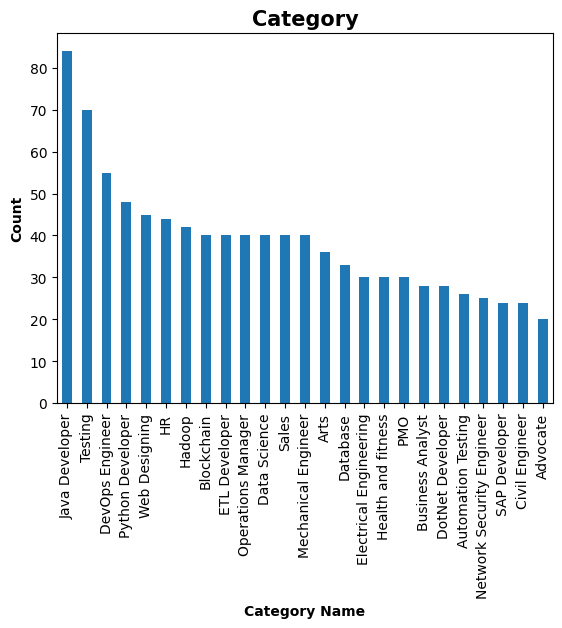

In [ ]:
# Visualizing value count of the category column
data['Category'].value_counts().plot(kind='bar')
plt.title('Category', fontsize=15, fontweight='bold')
plt.xlabel('Category Name', fontweight='bold')
plt.ylabel('Count', fontweight='bold');

In [ ]:
# Checking the unique values inside category column
labels = data['Category'].unique()
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

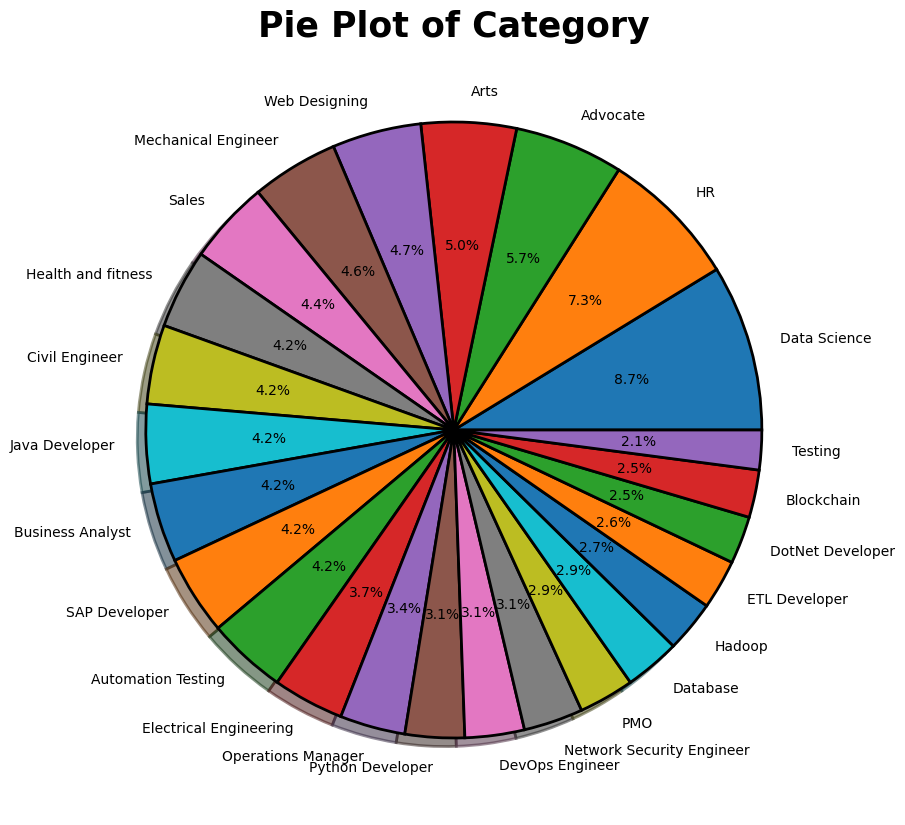

In [ ]:
# Visualizing category column using pie plot
plt.figure(figsize=(15,10))
wp={'linewidth':2, 'edgecolor':'black'}
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops=wp)
plt.title('Pie Plot of Category', fontsize=25, fontweight='bold');

In [ ]:
data['Category'][0] # Checking the zeroth index value of the category column

'Data Science'

In [ ]:
data['Resume'][0] # Checking the zeroth index value of the Resume column

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
# Created a function called CleanResume to clean the text data inside Resume column using regex
def CleanResume(txt):
  cleanTxt = txt.lower()
  cleanTxt = re.sub('http\S+\s', ' ', cleanTxt)
  cleanTxt = re.sub('RT|cc', ' ', cleanTxt)
  cleanTxt = re.sub('#\S+\s', ' ', cleanTxt)
  cleanTxt = re.sub('@\S+', ' ', cleanTxt)
  cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""), ' ', cleanTxt)
  cleanTxt = re.sub(r'[^\100-\x7f]', ' ', cleanTxt)
  cleanTxt = re.sub('\s+', ' ', cleanTxt)
  return cleanTxt

In [ ]:
data['Cleaned_Resume'] = data['Resume'].apply(lambda x: CleanResume(x)) # Applying the CleanResume function to the Resume column

In [ ]:
data['Cleaned_Resume'][0] # Checking the zeroth index of the cleaned resume column

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review proce

In [ ]:
data.Category.unique() # Checking the unique values in the Category column

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
# Label Encoding Category column
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data

,Category,Resume,Cleaned_Resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,23,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


In [ ]:
# Tokenizing and cleaning sentences
StopWords = set(stopwords.words('english')+['``',"''"])
total_words = []
sentences = data['Resume'].values
cleanSentences = ""
for i in range(0,962):
  cleanTxt = CleanResume(sentences[i])
  cleanSentences += cleanTxt
  requiredWords = nltk.word_tokenize(cleanTxt)
  for word in requiredWords:
    if word not in StopWords and word not in string.punctuation:
      total_words.append(word)

In [ ]:
# Checking the frequency of the words
wfd = nltk.FreqDist(total_words)
mostCommon = wfd.most_common(10)
mostCommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('Project', 1808),
 ('project', 1579),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385)]

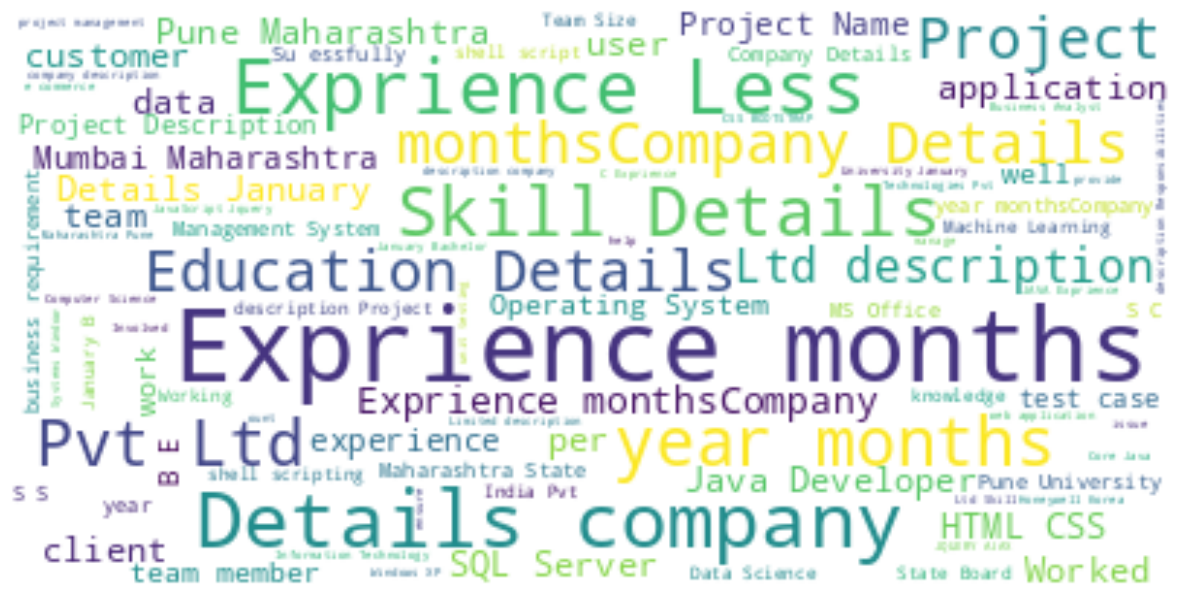

In [ ]:
# Visualizing the most common words using WordCloud
word_cloud = WordCloud(background_color='white').generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");

In [ ]:
# Splitting dataset into X and y
X = data['Cleaned_Resume']
y = data['Category']

In [ ]:
# Creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769,), (193,), (769,), (193,))

In [ ]:
# Applying TFIDF Vectorizer and fitting the data to the created model
tfidf = TfidfVectorizer(stop_words='english', max_features=1500)
knc = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean', algorithm='auto')

model = Pipeline([('Vectorizer',tfidf), ('Model', knc)])
model.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer',
                 TfidfVectorizer(max_features=1500, stop_words='english')),
                ('Model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                      weights='distance'))])

In [ ]:
model.score(X_test, y_test) # Checking the test score

0.9948186528497409

In [ ]:
# Checking the test score using the accuracy_score function
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9948186528497409

In [ ]:
model.score(X_train, y_train) # Checking the training score

1.0

In [ ]:
# Checking the training score using the accuracy_score function
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [ ]:
# Checking Precision,	Recall, F1-Score using classification_report function
pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,3.000000
1,1.000000,1.000000,1.000000,6.000000
2,1.000000,1.000000,1.000000,5.000000
3,1.000000,1.000000,1.000000,7.000000
4,1.000000,1.000000,1.000000,4.000000
5,1.000000,1.000000,1.000000,9.000000
6,1.000000,1.000000,1.000000,5.000000
7,1.000000,1.000000,1.000000,8.000000
8,1.000000,0.928571,0.962963,14.000000
9,1.000000,1.000000,1.000000,5.000000


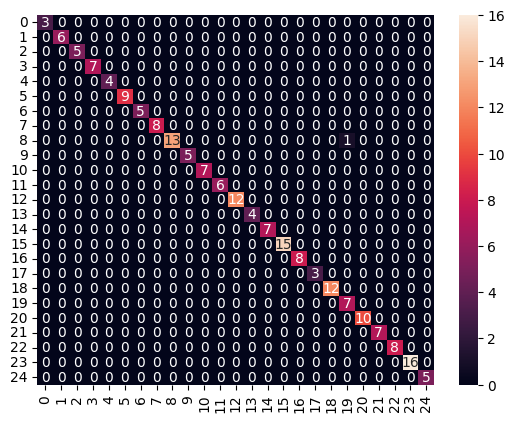

In [ ]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True);

In [ ]:
pickle.dump(model, open('Resume_Screening_model.pkl', 'wb')) # Saving the model

In [ ]:
loaded_model = pickle.load(open('Resume_Screening_model.pkl', 'rb')) # Loading the saved model

In [ ]:
# Sample data for testing the loaded model
resume_example_1 = """CHARLOTTE MAY Senior Data Scientist | CAP | DASCA +1-555-0100
            latishaham@hey.com www.linkedin.com/in/--lhamilton-- Phoenix,
            AZ SUMMARY With eight years experience working as a data scientist
            and more than ten years of strong academic background in analytical
            modeling and programming, I strive to bring high-quality business
            intelligence solutions to businesses seeking higher efficiency.
            With expertise in advanced statistical algorithms, machine learning
            and forecasting, I have also worked on over 1150 high performance parallel
            processing applications using C++ and C. EXPERIENCE Senior Data Scientist
            - Marketing Team Dell 2018 - Present Phoenix, AZ Turned data into actionable
            insights, providing C-suite stakeholders with insightful recommendations to
            streamline business operations and improve customer experience. Generated
            statistical reports and visualizations, providing key insights for more
            than 20 marketing campaigns and initiatives, including A/B testing, customer
            retention, brand awareness, and global expansion. • Worked with senior
            leadership to develop and implement digital marketing strategy, identifying
            and implementing new tactics to improve campaign performance by 50%, resulting
            in 250% increase in revenue from search marketing campaigns. Senior Data Scientist
            Metro 2018 - 2020 Phoenix, AZ Designed and implemented a machine learning system
            that predicts hardware malfunction with more than 80% accuracy. Created global
            and personalized real time reports system for executives stakeholders and
            processes in SAS, Tableau, and proprietary systems. Worked closely with a team
            of data engineers and BI analysts to improve the efficiency customer recommendation
            analytics engine by 33%. Data Scientist Drouin S.A.R.L. 2014 - 2018 Phoenix, AZ
            Collected technical requirements for $500K+ customer accounts, defining
            data rules for and KPIs for performance metrics. Perform HR data collection
            and a variety of statistical analyses using Microsoft Excel, SAS, Tableau
            and Python. Assisted senior data """

In [ ]:
# Making predictions with the loaded model
clean_resume = CleanResume(resume_example_1)

clean_resume = np.array([clean_resume])

predict = loaded_model.predict(clean_resume)

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

predicted_category = category_mapping.get(predict[0], 'Unknown')

print("It is a \033[4m{}\033[0m resume and the id is {}".format(predicted_category, predict))


It is a Data Science resume and the id is [6]
